In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
from scipy import stats

## Load Data

In [2]:
# set id as index and make 'create_at' a Datetime object
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=[1]).set_index(keys=['id']) 

## Filter Data

In [3]:
# retrieve rate from tweet. return None if not found or rate over 20
def findRating(s):
    match = re.search(r'(\d+(\.\d+)?)/10', s)
    if match:
        rate = match.groups(1)[0] # retrieve rate
        #filter ratings: mark rating as None if greater than 20
        if float(rate) > 20:
            return None
        else:
            return rate
    else:
        return None
    
# vectorize findRating
findRating = np.vectorize(findRating, otypes=[np.float])

# get rates from text
data['rate'] = findRating(data['text'])

# exclude outliers and texts with no ratings
data = data[pd.notnull(data['rate'])]

## Prepare for Linear Fitting

In [4]:
# helper function to retreive Timestamp of Datetime objects before using <scipy.stats.linregress>
# return None if argument is not Datetime object
def to_timestamp(dt):
    # check if argument is Datetime object
    if isinstance(dt, datetime.datetime):
        return dt.timestamp()
    else:
        return None

data['timestamp'] = data['created_at'].apply(to_timestamp)

## Linear Fitting

In [5]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['timestamp'],data['rate'])

## Data, slope and intercept of the best-fit line, and a scatterplot with fit line

In [6]:
data

,created_at,text,rate,timestamp
id,,,,
862722525377298433,2017-05-11 17:34:13,"b""This is Dave. He passed the h*ck out. It's b...",11.0,1.494549e+09
862096992088072192,2017-05-10 00:08:34,"b""We only rate dogs. Please don't send perfect...",13.0,1.494400e+09
861769973181624320,2017-05-09 02:29:07,"b'RT @dog_rates: ""Good afternoon class today w...",13.0,1.494322e+09
861383897657036800,2017-05-08 00:54:59,"b""This is Hobbes. He's never seen bubbles befo...",13.0,1.494230e+09
861005113778896900,2017-05-06 23:49:50,b'This is Burt. He thinks your thesis statemen...,12.0,1.494140e+09
860981674716409858,2017-05-06 22:16:42,"b""RT @dog_rates: Meet Lorenzo. He's an avid ni...",13.0,1.494134e+09
860924035999428608,2017-05-06 18:27:40,b'RT @tallylott: h*ckin adorable promposal. 13...,13.0,1.494120e+09
860563773140209665,2017-05-05 18:36:06,"b""Meet Lorenzo. He's an avid nifty hat wearer ...",13.0,1.494035e+09
860524505164394496,2017-05-05 16:00:04,"b""This is Carl. He likes to dance. Doesn't car...",13.0,1.494025e+09


In [7]:
slope, intercept

(5.9637051903134871e-08, -76.53657820899295)

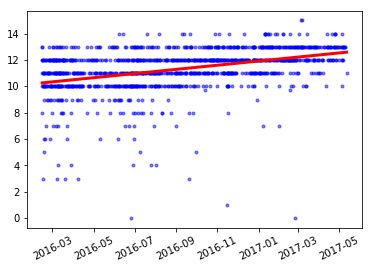

In [8]:
plt.xticks(rotation=25)
plt.plot(data['created_at'],data['rate'], 'b.', alpha=0.5)
plt.plot(data['created_at'],data['timestamp']*slope + intercept, 'r-', linewidth=3)
plt.show()

## P-Value
### “is the slope different from zero?”

In [28]:
p_value

2.6254167274167866e-44

## histogram

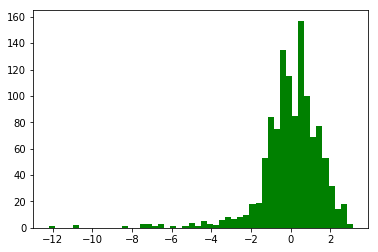

In [29]:
residuals = (data['rate'] - (data['timestamp']*slope + intercept)) # observed - predictions
plt.hist(residuals, 50, facecolor='green')
plt.show()

## End